## 3º Hack Days Comunidade DS

### 0.0 Libraries, Functions and Loading Data

In [1]:
import numpy                 as np
import pandas                as pd
import seaborn               as sns
import sweetviz              as sv
import matplotlib.pyplot     as plt 

from sklearn                 import model_selection as ms
from sklearn                 import metrics
from sklearn                 import ensemble as en
from xgboost                 import XGBClassifier
from lightgbm                import LGBMClassifier
from sklearn.svm             import SVC
from sklearn.metrics         import ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble        import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from category_encoders       import TargetEncoder
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.naive_bayes     import GaussianNB
from sklearn.linear_model    import LogisticRegression
from sklearn.preprocessing   import LabelEncoder, RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#### 0.1 Functions

In [2]:
sns.set(rc={'figure.figsize':(16, 8)})

#### 0.2 Loading Data

In [3]:
train_raw = pd.read_csv('csv_files/train.csv')
test_raw = pd.read_csv('csv_files/test.csv')

In [4]:
# Spliting target variable column
X = train_raw.drop('limite_adicional', axis=1)
y = train_raw['limite_adicional'].copy()

# Spliting dataset into train and test datasets
x_train, x_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.20, random_state=42)

# Concateneting dataset
df1 = pd.concat([x_train, y_train], axis=1)

### 1.0 Data Description

#### 1.1 Shape

In [5]:
print(f'Números de linhas: {df1.shape[0]}')
print(f'Números de colunas: {df1.shape[1]}')

Números de linhas: 7600
Números de colunas: 17


#### 1.2 Columns

In [6]:
df1.columns

Index(['id_cliente', 'idade', 'saldo_atual', 'divida_atual', 'renda_anual',
       'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
       'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
       'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros',
       'investe_exterior', 'pessoa_polit_exp', 'limite_adicional'],
      dtype='object')

#### 1.3 Data Types

In [7]:
df1.dtypes

id_cliente                   int64
idade                        int64
saldo_atual                float64
divida_atual               float64
renda_anual                float64
valor_em_investimentos     float64
taxa_utilizacao_credito    float64
num_emprestimos              int64
num_contas_bancarias         int64
num_cartoes_credito          int64
dias_atraso_dt_venc          int64
num_pgtos_atrasados          int64
num_consultas_credito        int64
taxa_juros                   int64
investe_exterior            object
pessoa_polit_exp            object
limite_adicional            object
dtype: object

#### 1.4 Check NA

In [8]:
df1.isna().sum()

id_cliente                 0
idade                      0
saldo_atual                0
divida_atual               0
renda_anual                0
valor_em_investimentos     0
taxa_utilizacao_credito    0
num_emprestimos            0
num_contas_bancarias       0
num_cartoes_credito        0
dias_atraso_dt_venc        0
num_pgtos_atrasados        0
num_consultas_credito      0
taxa_juros                 0
investe_exterior           0
pessoa_polit_exp           0
limite_adicional           0
dtype: int64

#### 1.5 Descriptive Statistics

In [9]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id_cliente,7600.0,6195.151184,3.590736e+03,1.000000,3101.250000,6135.000000,9298.250000,1.250000e+04
idade,7600.0,123.613684,6.767724e+02,18.000000,28.000000,38.000000,47.000000,8.598000e+03
saldo_atual,7600.0,403.503742,2.175478e+02,0.908146,271.744768,337.139895,470.944544,1.602041e+03
divida_atual,7600.0,1442.200337,1.160883e+03,0.230000,573.707500,1178.340000,1972.337500,4.998070e+03
renda_anual,7600.0,182809.120450,1.391849e+06,10473.865350,26205.526007,45899.953750,80399.209075,2.310824e+07
valor_em_investimentos,7600.0,611.175524,1.999520e+03,0.000000,76.063639,134.201478,251.619466,1.000000e+04
taxa_utilizacao_credito,7600.0,32.235292,5.133365e+00,20.992914,27.991416,32.205033,36.437150,4.956452e+01
num_emprestimos,7600.0,11.195789,6.453960e+01,0.000000,2.000000,3.000000,6.000000,1.496000e+03
num_contas_bancarias,7600.0,17.816447,1.225567e+02,0.000000,3.000000,6.000000,8.000000,1.756000e+03
num_cartoes_credito,7600.0,21.951447,1.247211e+02,1.000000,4.000000,6.000000,7.000000,1.479000e+03


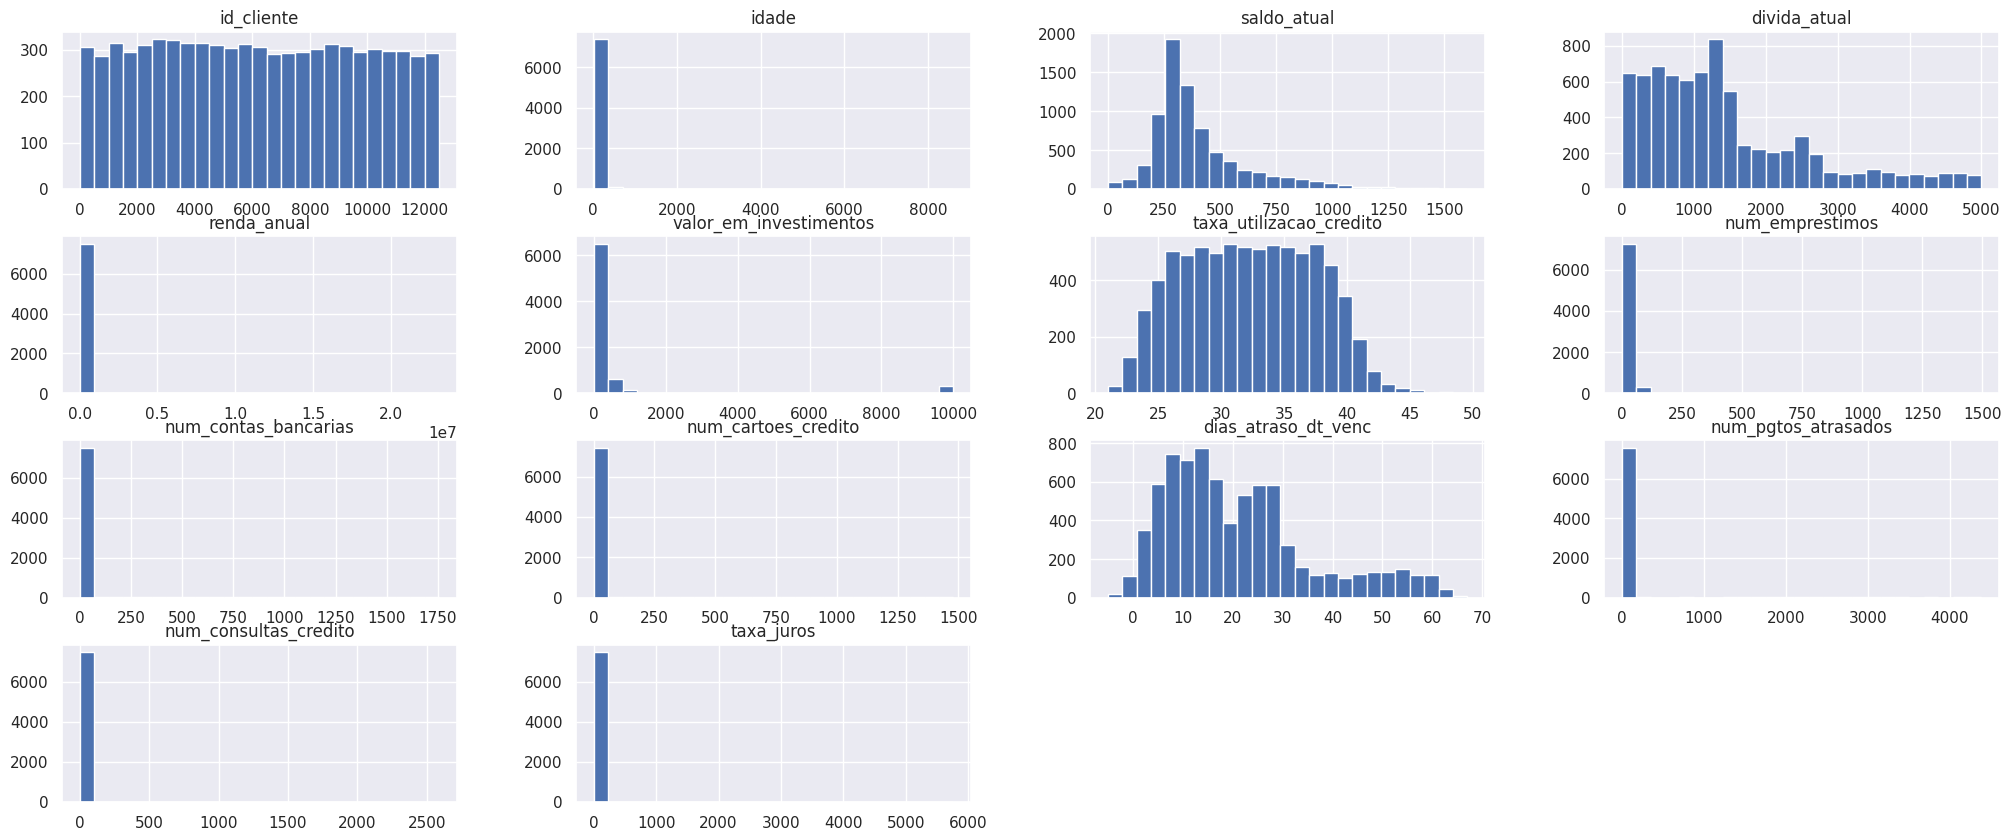

In [10]:
num_attributes = df1.select_dtypes(include=['float64', 'int64'])
cat_attributes = df1.select_dtypes(exclude=['float64', 'int64'])
num_attributes.hist(figsize=(25, 10), bins=25);

In [11]:
d1 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d2 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T
d3 = pd.concat([d1, d2]).T.reset_index()
d3.columns = ['attributes', 'skew', 'kurtosis']
d3

,attributes,skew,kurtosis
0,id_cliente,0.025183,-1.195675
1,idade,9.252848,90.657098
2,saldo_atual,1.618415,3.114865
3,divida_atual,1.178158,0.803166
4,renda_anual,12.410241,162.923722
5,valor_em_investimentos,4.443809,17.937286
6,taxa_utilizacao_credito,0.053696,-0.919013
7,num_emprestimos,16.189707,303.296082
8,num_contas_bancarias,10.723897,119.087686
9,num_cartoes_credito,8.425038,74.368182


#### 1.5 Sweetviz

In [12]:
# Runing Sweetviz data visualization
# sweet = sv.analyze(df4);
# sweet.show_html();

### 2.0 Feature Engineering

In [13]:
df2 = df1.copy()

In [14]:
# Potential investor/age
df2['pot_inv'] = df2['valor_em_investimentos'] / (df2['idade'] - 17) 
x_test['pot_inv'] = x_test['valor_em_investimentos'] / (x_test['idade'] - 17) 
test_raw['pot_inv'] = test_raw['valor_em_investimentos'] / (test_raw['idade'] - 17) 


# Potential debt/year
df2['pot_endiv'] = df2['divida_atual'] / (df2['idade'] - 17)
x_test['pot_endiv'] = x_test['divida_atual'] / (x_test['idade'] - 17)
test_raw['pot_endiv'] = test_raw['divida_atual'] / (test_raw['idade'] - 17)


# Potential per capita investment
df2['pot_capital'] = df2['pot_endiv'] - df2['pot_inv']
x_test['pot_capital'] = x_test['pot_endiv'] - x_test['pot_inv']
test_raw['pot_capital'] = test_raw['pot_endiv'] - test_raw['pot_inv']


# Debt by income
df2['renda_divida'] = df2['divida_atual'] / df2['renda_anual']
x_test['renda_divida'] = x_test['divida_atual'] / x_test['renda_anual']
test_raw['renda_divida'] = test_raw['divida_atual'] / test_raw['renda_anual']

### 3.0 Data Filtering

In [15]:
df3 = df2.copy()

In [16]:
# Manual Scaling for outliers
df3['idade'] = df3['idade'].apply(lambda x: df3['idade'].median() if x >= 65 else x)
x_test['idade'] = x_test['idade'].apply(lambda x: x_test['idade'].median() if x >= 65 else x)
test_raw['idade'] = test_raw['idade'].apply(lambda x: test_raw['idade'].median() if x >= 65 else x)

df3['num_cartoes_credito'] = df3['num_cartoes_credito'].apply(lambda x: df3['num_cartoes_credito'].median() if x >= 15 else x)
x_test['num_cartoes_credito'] = x_test['num_cartoes_credito'].apply(lambda x: df3['num_cartoes_credito'].median() if x >= 15 else x)
test_raw['num_cartoes_credito'] = test_raw['num_cartoes_credito'].apply(lambda x: df3['num_cartoes_credito'].median() if x >= 15 else x)

df3['num_emprestimos'] = df3['num_emprestimos'].apply(lambda x: df3['num_emprestimos'].median() if x >= 9 else x)
x_test['num_emprestimos'] = x_test['num_emprestimos'].apply(lambda x: x_test['num_emprestimos'].median() if x >= 9 else x)
test_raw['num_emprestimos'] = test_raw['num_emprestimos'].apply(lambda x: test_raw['num_emprestimos'].median() if x >= 9 else x)

### 4.0 Exploratory Data Analysis (EDA)

In [17]:
df4 = df3.copy()

In [18]:
num_attributes = df1.select_dtypes(include=['float64', 'int64'])
cat_attributes = df1.select_dtypes(exclude=['float64', 'int64'])

In [19]:
num_attributes = df4.drop(['id_cliente'], axis=1)

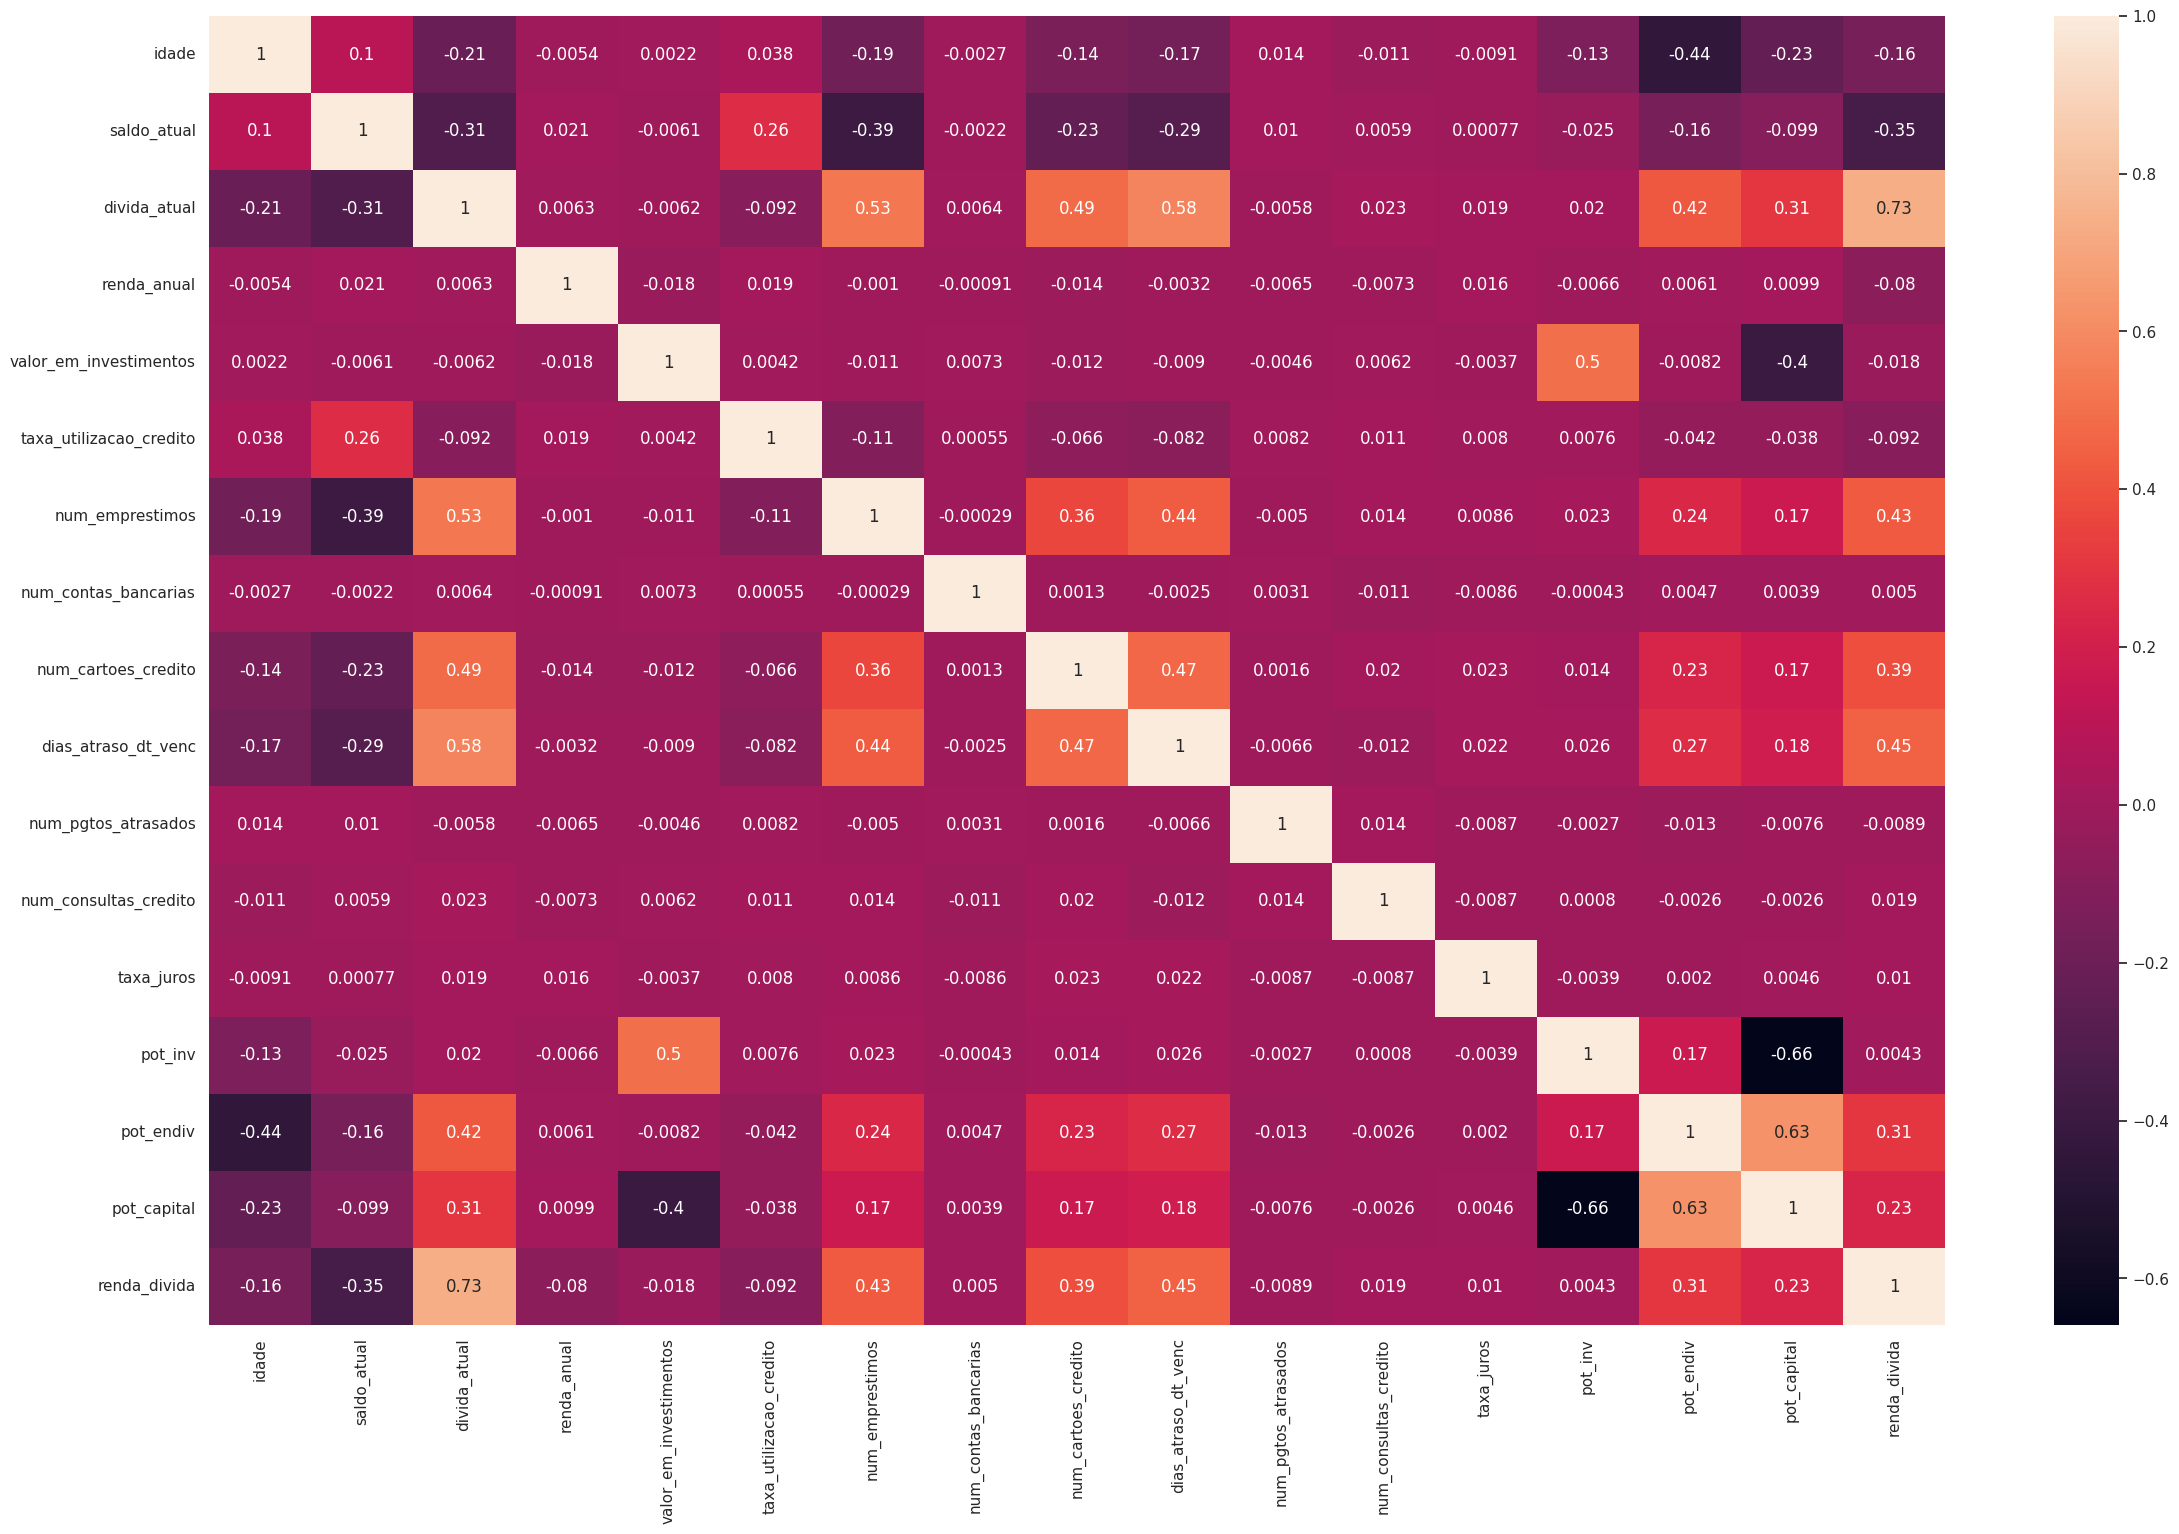

In [20]:
sns.set(rc={'figure.figsize':(28, 17)})
correlation = num_attributes.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation, annot=True);

### 5.0 Data Preparation

In [21]:
df5 = df4.copy()

In [22]:
df5.dtypes

id_cliente                   int64
idade                      float64
saldo_atual                float64
divida_atual               float64
renda_anual                float64
valor_em_investimentos     float64
taxa_utilizacao_credito    float64
num_emprestimos            float64
num_contas_bancarias         int64
num_cartoes_credito        float64
dias_atraso_dt_venc          int64
num_pgtos_atrasados          int64
num_consultas_credito        int64
taxa_juros                   int64
investe_exterior            object
pessoa_polit_exp            object
limite_adicional            object
pot_inv                    float64
pot_endiv                  float64
pot_capital                float64
renda_divida               float64
dtype: object

In [23]:
categorical = df5.select_dtypes(exclude=['float64', 'int64'])
categorical.apply(lambda x: x.unique().shape[0])

investe_exterior    2
pessoa_polit_exp    2
limite_adicional    2
dtype: int64

In [24]:
# Encoding categorical attributes
le = LabelEncoder()

df5['investe_exterior'] = le.fit_transform(df5['investe_exterior'])
x_test['investe_exterior'] = le.transform(x_test['investe_exterior'])
test_raw['investe_exterior'] = le.transform(test_raw['investe_exterior'])

df5['pessoa_polit_exp'] = le.fit_transform(df5['pessoa_polit_exp'])
x_test['pessoa_polit_exp'] = le.transform(x_test['pessoa_polit_exp'])
test_raw['pessoa_polit_exp'] = le.transform(test_raw['pessoa_polit_exp'])

In [25]:
numerical = df5.select_dtypes(exclude=['object'])
numerical.apply(lambda x: x.unique().shape[0])

id_cliente                 7600
idade                        42
saldo_atual                7527
divida_atual               7490
renda_anual                7594
valor_em_investimentos     6896
taxa_utilizacao_credito    7600
num_emprestimos               9
num_contas_bancarias        111
num_cartoes_credito          10
dias_atraso_dt_venc          73
num_pgtos_atrasados          84
num_consultas_credito       126
taxa_juros                  165
investe_exterior              2
pessoa_polit_exp              2
pot_inv                    6995
pot_endiv                  7595
pot_capital                7600
renda_divida               7600
dtype: int64

### 6.0 Feature Selection

In [26]:
df6 = df5.copy()

In [27]:
df6 = df6.drop(['pessoa_polit_exp'], axis=1)
x_test = x_test.drop(['pessoa_polit_exp'], axis=1)
test_raw = test_raw.drop(['pessoa_polit_exp'], axis=1)

df6 = df6.drop(['id_cliente'], axis=1)
x_test = x_test.drop(['id_cliente'], axis=1)
test_raw = test_raw.drop(['id_cliente'], axis=1)

### 7.0 Machine Learning Modelling

In [28]:
df7 = df6.copy()

In [29]:
# Droping and encoding target variable

X = df7.drop('limite_adicional', axis=1)
y = df7['limite_adicional'].copy()
y = le.fit_transform(y)
y_test = le.fit_transform(y_test)

#### Model Random Forest Classifier

In [30]:
rfc_model = en.RandomForestClassifier(random_state=42)

rfc_model.fit(X, y)

y_hat_rfc = rfc_model.predict(x_test)

rfc_result = metrics.f1_score(y_test, y_hat_rfc)
rfc_result

0.9269628727936703

In [31]:
# Checking another metrics of evaluation
f1 = metrics.f1_score(y_test, y_hat_rfc)
accuracy = metrics.accuracy_score(y_test, y_hat_rfc)
recall = metrics.recall_score(y_test, y_hat_rfc)
precision = metrics.precision_score(y_test, y_hat_rfc)

results = pd.DataFrame([f1, accuracy, recall, precision], index=['F1', 'Accuracy', 'Recall', 'Precision'])
results.columns = ['Resultado KNN']
results

,Resultado KNN
F1,0.926963
Accuracy,0.873684
Recall,0.961490
Precision,0.894830


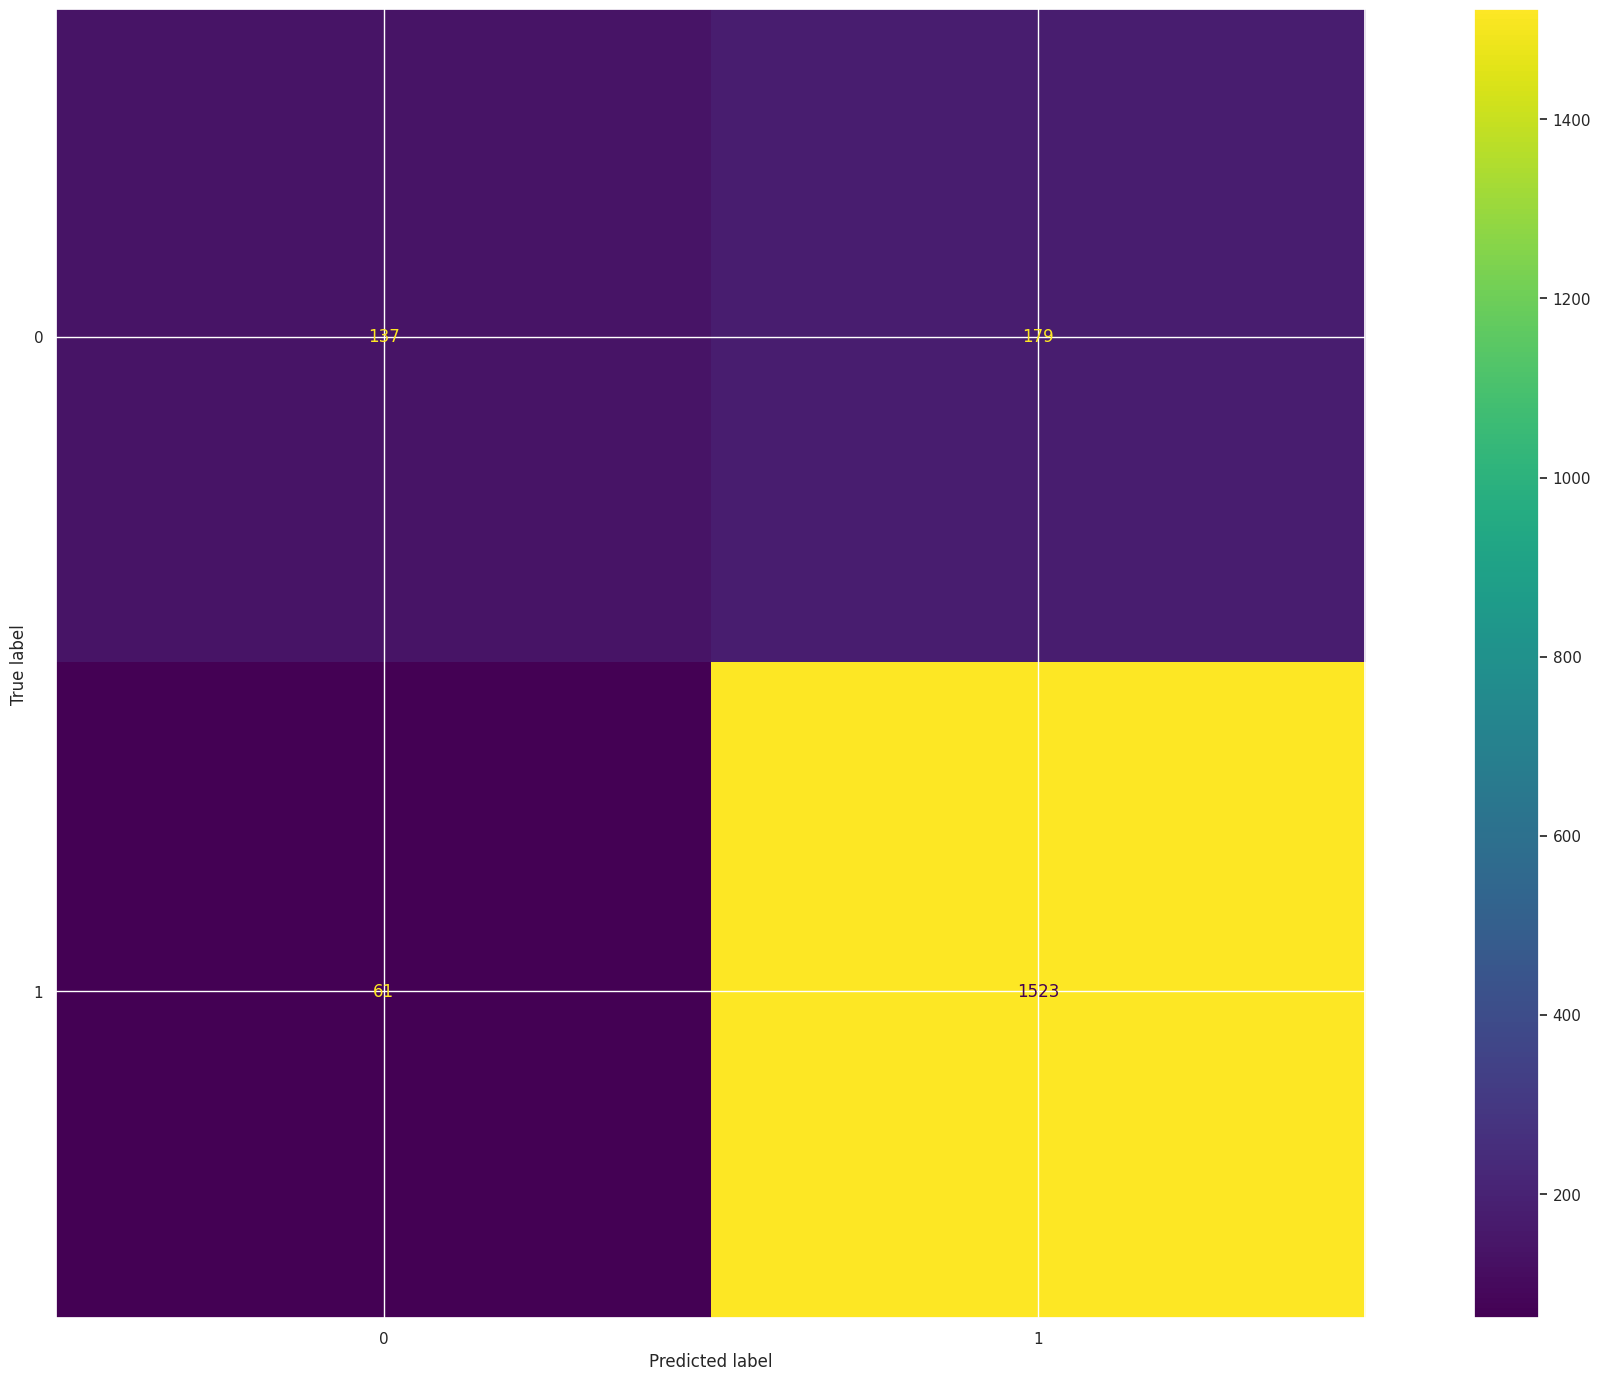

In [32]:
cm = confusion_matrix(y_test, y_hat_rfc, labels=rfc_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc_model.classes_)
disp.plot();

#### Model LGBMClassifier

In [33]:
lgbm_model = LGBMClassifier(random_state=42, n_jobs=-1)

lgbm_model.fit(X, y)

y_hat_lgbm = lgbm_model.predict(x_test)

lgbm_result = metrics.f1_score(y_test, y_hat_lgbm)
lgbm_result

0.9250614250614251

In [34]:
# Checking another metrics of evaluation
f1 = metrics.f1_score(y_test, y_hat_lgbm)
accuracy = metrics.accuracy_score(y_test, y_hat_lgbm)
recall = metrics.recall_score(y_test, y_hat_lgbm)
precision = metrics.precision_score(y_test, y_hat_lgbm)

results = pd.DataFrame([f1, accuracy, recall, precision], index=['F1', 'Accuracy', 'Recall', 'Precision'])
results.columns = ['Resultado KNN']
results

,Resultado KNN
F1,0.925061
Accuracy,0.871579
Recall,0.950758
Precision,0.900718


#### Model XGBoost Classifier

In [35]:
xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X, y)

y_hat_xgb = xgb_model.predict(x_test)

xgb_result = metrics.f1_score(y_test, y_hat_xgb)
xgb_result

0.9252537680713627

In [36]:
# Checking another metrics of evaluation
f1 = metrics.f1_score(y_test, y_hat_xgb)
accuracy = metrics.accuracy_score(y_test, y_hat_xgb)
recall = metrics.recall_score(y_test, y_hat_xgb)
precision = metrics.precision_score(y_test, y_hat_xgb)

results = pd.DataFrame([f1, accuracy, recall, precision], index=['F1', 'Accuracy', 'Recall', 'Precision'])
results.columns = ['Resultado KNN']
results

,Resultado KNN
F1,0.925254
Accuracy,0.872105
Recall,0.949495
Precision,0.902220


#### Model KNN Classifier

In [37]:
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

knn_model.fit(X, y)

y_hat_knn = knn_model.predict(x_test)

knn_result = metrics.f1_score(y_test, y_hat_knn)
knn_result

0.8940119760479043

In [38]:
# Checking another metrics of evaluation
f1 = metrics.f1_score(y_test, y_hat_knn)
accuracy = metrics.accuracy_score(y_test, y_hat_knn)
recall = metrics.recall_score(y_test, y_hat_knn)
precision = metrics.precision_score(y_test, y_hat_knn)

results = pd.DataFrame([f1, accuracy, recall, precision], index=['F1', 'Accuracy', 'Recall', 'Precision'])
results.columns = ['Resultado KNN']
results

,Resultado KNN
F1,0.894012
Accuracy,0.813684
Recall,0.942551
Precision,0.850228


#### Model C-Support Vector Classification

In [39]:
svc_model = SVC(gamma='scale')

svc_model.fit(X, y)

y_hat_svc = svc_model.predict(x_test)

svc_result = metrics.f1_score(y_test, y_hat_svc)
svc_result

0.9092996555683123

In [40]:
# Checking another metrics of evaluation
f1 = metrics.f1_score(y_test, y_hat_svc)
accuracy = metrics.accuracy_score(y_test, y_hat_svc)
recall = metrics.recall_score(y_test, y_hat_svc)
precision = metrics.precision_score(y_test, y_hat_svc)

results = pd.DataFrame([f1, accuracy, recall, precision], index=['F1', 'Accuracy', 'Recall', 'Precision'])
results.columns = ['Resultado SVC']
results

,Resultado SVC
F1,0.909300
Accuracy,0.833684
Recall,1.000000
Precision,0.833684


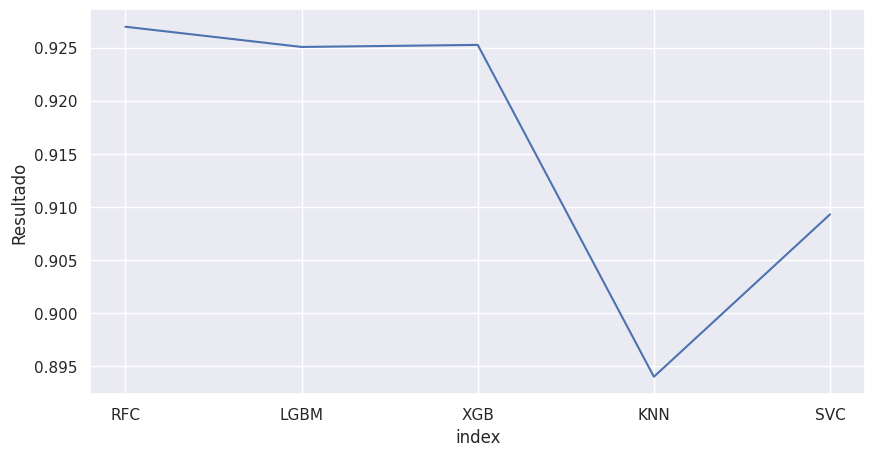

In [41]:
sns.set(rc={'figure.figsize':(10, 5)})
# Comparing the F1 Score of the four models above
results = pd.DataFrame([rfc_result, lgbm_result, xgb_result, knn_result, svc_result], index=['RFC', 'LGBM', 'XGB', 'KNN', 'SVC'])
results.columns = ['Resultado']
results.sort_values(by='Resultado', ascending=False)
results = results.reset_index()
sns.lineplot(data=results, x='index', y='Resultado');

### 8.0 Ensemble Learning

In [42]:
df8 = df7.copy()

In [43]:
X = df8.drop('limite_adicional', axis=1)
y = df8['limite_adicional'].copy()
y = le.fit_transform(y)
y_test = le.fit_transform(y_test)

In [44]:
rfc_model = en.RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9, n_estimators=25, n_jobs=-1, random_state=42)
lgbm_model = LGBMClassifier(learning_rate=0.05, max_depth=5, min_child_samples=15, num_leaves=40, reg_alpha=0.01, n_jobs=-1, n_estimators=502, random_state=42)
et_model = en.ExtraTreesClassifier(n_estimators=502, random_state=42, n_jobs=-1)
knn_clf = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
ada_clf = AdaBoostClassifier(n_estimators=502, random_state=42)
gnb_model = GaussianNB()
# svc_model = SVC(gamma='scale')


voting_clf = VotingClassifier(estimators=[('random_forest', rfc_model), ('extra_tree', et_model), ('lgbm', lgbm_model), 
                                          ('knn', knn_clf), ('ada', ada_clf), ('gaussNB', gnb_model)#, ('svc_model', svc_model)
                                          ],
                              voting='soft', # 'soft' usa probabilidades para votação, enquanto 'hard' usa rótulos
                              weights=[1, 1, 1, 1, 1, 1], # Pode ser usado para ponderar a importância de cada classificador, como [2, 1, 3, ...]
                              n_jobs=-1)

voting_clf.fit(X, y)

y_hat_voting = voting_clf.predict(x_test)

In [45]:
# Checking another metrics of evaluation
f1 = metrics.f1_score(y_test, y_hat_voting)
accuracy = metrics.accuracy_score(y_test, y_hat_voting)
recall = metrics.recall_score(y_test, y_hat_voting)
precision = metrics.precision_score(y_test, y_hat_voting)


results = pd.DataFrame([f1, accuracy, recall, precision], index=['F1', 'Accuracy', 'Recall', 'Precision'])
results.columns = ['Resultado']
results

,Resultado
F1,0.928834
Accuracy,0.877895
Recall,0.955808
Precision,0.903341


#### 8.1 Hyperparameter Fine Tuning

#### 8.2 Grid Search

##### Random Forest Classifier Fine Tuning

In [46]:
# param_grid = {'n_estimators': [5, 25, 50, 100, 150, 300, 512],
# 	          'max_features': ['sqrt', 'log2', None],
# 	          'max_depth': [3, 6, 9],
# 	          'max_leaf_nodes': [3, 6, 9],
#               'n_jobs': [-1],
#               'random_state': [0, 42],
#               'bootstrap': [True, False]}

# grid_search = GridSearchCV(RandomForestClassifier(),
#                            param_grid=param_grid,
#                            #cv=5, Default
#                            )
# grid_search.fit(X, y)
# print(grid_search.best_estimator_)

# RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9, n_estimators=25, n_jobs=-1, random_state=42)

In [47]:
rfc_model_tunned = en.RandomForestClassifier(max_depth=6,
                                             max_features=None, 
                                             max_leaf_nodes=9, 
                                             n_estimators=25, 
                                             n_jobs=-1, 
                                             random_state=42)

rfc_model_tunned.fit(X, y)

y_hat_rfc = rfc_model_tunned.predict(x_test)

rfc_result = metrics.f1_score(y_test, y_hat_rfc)
rfc_result

0.9271242818264289

In [48]:
# Checking another metrics of evaluation
f1 = metrics.f1_score(y_test, y_hat_rfc)
accuracy = metrics.accuracy_score(y_test, y_hat_rfc)
recall = metrics.recall_score(y_test, y_hat_rfc)
precision = metrics.precision_score(y_test, y_hat_rfc)


results = pd.DataFrame([f1, accuracy, recall, precision], index=['F1', 'Accuracy', 'Recall', 'Precision'])
results.columns = ['Resultado']
results

,Resultado
F1,0.927124
Accuracy,0.873158
Recall,0.967803
Precision,0.889727


##### LGBM Fine Tuning

In [49]:
# lgbm = LGBMClassifier()

# parameters = {'num_leaves':[20,40,60,80,100],
#               'min_child_samples':[5,10,15],
#               'max_depth':[-1,5,10,20],
#               'learning_rate':[0.05,0.1,0.2],
#               'reg_alpha':[0,0.01,0.03]}


# lgbm_gs = GridSearchCV(estimator=lgbm, param_grid=parameters,
#                        scoring='f1', verbose=2, cv=7)

# gd_src = lgbm_gs.fit(X, y)
# gd_src.best_estimator_

In [50]:
# # # LGBMClassifier
# # # LGBMClassifier(learning_rate=0.05, max_depth=5, min_child_samples=15,
# # #                num_leaves=40, reg_alpha=0.01)


# lgbm_tunned = LGBMClassifier(learning_rate=0.05, max_depth=5, min_child_samples=15,
#                              num_leaves=40, reg_alpha=0.01, n_estimators=502, n_jobs=-1)

# lgbm_tunned.fit(X, y)

# y_hat_tunned = lgbm_tunned.predict(x_test)

# tunned_result = metrics.f1_score(y_test, y_hat_tunned)
# tunned_result

### 9.0 Submission

#### 9.1 Ensemble Model

In [51]:
# y_hat = voting_clf.predict(test_raw)
# raw = pd.read_csv('csv_files/test.csv')
# test_raw['id_cliente'] = raw['id_cliente']
# submission = pd.concat([test_raw, pd.Series(y_hat)], axis=1).rename(columns={0: 'limite_adicional'})
# submission['limite_adicional'] = submission['limite_adicional'].apply(lambda x: 'Conceder' if x == 0 else 'Negar')

# submission[['id_cliente', 'limite_adicional']].to_csv('submission/submit01.csv', index=False)

#### 9.2 RFC Tunned Model

In [52]:
# y_hat = rfc_model_tunned.predict(test_raw)
# raw = pd.read_csv('csv_files/test.csv')
# test_raw['id_cliente'] = raw['id_cliente']
# submission = pd.concat([test_raw, pd.Series(y_hat)], axis=1).rename(columns={0: 'limite_adicional'})
# submission['limite_adicional'] = submission['limite_adicional'].apply(lambda x: 'Conceder' if x == 0 else 'Negar')

# submission[['id_cliente', 'limite_adicional']].to_csv('submission/submit_rfc.csv', index=False)